**Credit card fraud is a major concern, and this notebook explores fraud detection using machine learning. It covers data preprocessing, visualization, feature engineering, and model building to detect fraudulent transactions.**

1. pandas – For handling structured data (tables, CSV files, etc.).
2. numpy – For numerical computations and array manipulations.
3. matplotlib.pyplot – For creating static visualizations.
4. seaborn – Enhances visualizations, making them more informative.
5. statistics – Provides basic statistical functions.

Processing Libraries:
1. sklearn.metrics – Provides evaluation metrics like accuracy, precision-recall, and ROC curves.
2. sklearn.preprocessing – Includes StandardScaler for feature scaling.
3. sklearn.model_selection – Contains train_test_split and GridSearchCV for model tuning.
4. mpl_toolkits.mplot3d – Used for 3D plotting.
5. collections – Provides specialized data structures like Counter.
6. scipy.stats – Contains statistical functions such as uniform.

Machine Learning Models:
1. sklearn.manifold.TSNE – A dimensionality reduction technique for visualizing high-dimensional data.
2. sklearn.ensemble.RandomForestClassifier – A powerful tree-based model for classification.
3. sklearn.tree.DecisionTreeClassifier – A simple tree-based classifier.
4. sklearn.linear_model.Lasso – A regression model with L1 regularization.
5. sklearn.linear_model.LogisticRegression – A fundamental classification model.
6. xgboost – An optimized gradient boosting algorithm for structured data.
7. AdaBoostClassifier – Adaptive boosting for improving weak classifiers.
8. lightgbm – A fast, efficient boosting algorithm for large datasets.

In [2]:
# importing all the necessary libraries that I have used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

# Import processing libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve,average_precision_score, recall_score, precision_score, roc_curve, auc, f1_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
from scipy.stats import uniform


## Models
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb

In [5]:
Credit_Card_DataFrame = pd.read_csv("A:/Github/Projects/Credit Card Fraud Detection Project/DataSet/creditcard.csv")
Credit_Card_DataFrame

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**Boosting Techniques**

**1. AdaBoost**

In [112]:
# Prepping the dataset for Adaboost

X = Credit_Card_DataFrame.drop(columns=["Class","Amount Range","Time Range"])
scaler = StandardScaler()
X[["Time","Amount"]] = scaler.fit_transform(X[["Time","Amount"]])
y = Credit_Card_DataFrame["Class"]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1111, stratify=y)

In [113]:
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=500,
    random_state=1111
)
param_grid = {
    'learning_rate':[0.01,0.1]
}
grid_search = GridSearchCV(
    adaboost, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

best_model.fit(x_train, y_train)

Best Parameters: {'learning_rate': 0.1}


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=500, random_state=1111)

Accuracy: 0.9992802219023208
Confusion Matrix:
 [[56854    10]
 [   31    67]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.68      0.77        98

    accuracy                           1.00     56962
   macro avg       0.93      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962



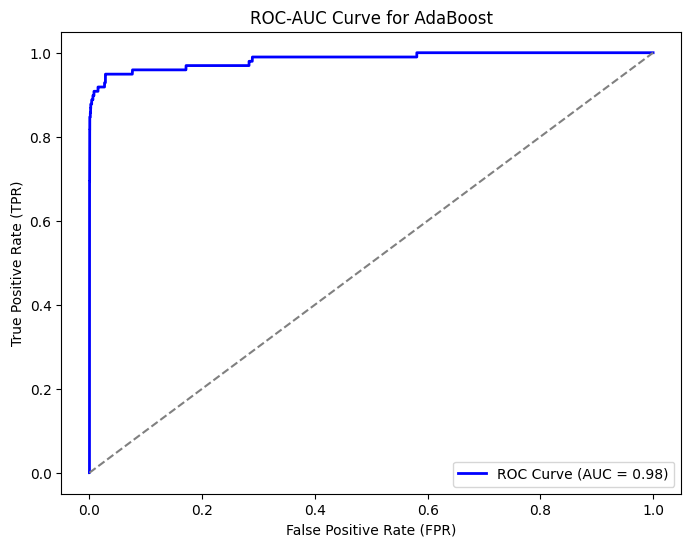

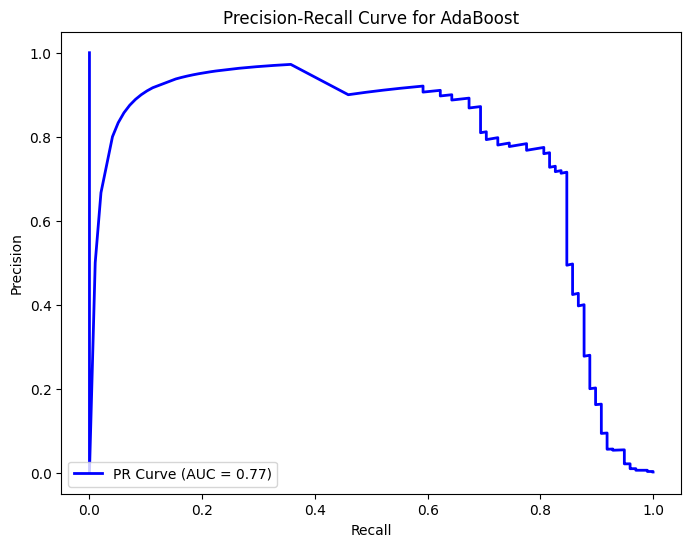

In [116]:
# Make predictions

y_pred = best_model.predict(x_test)
y_probability = best_model.predict_proba(x_test)[:, 1]

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probability)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_probability)
pr_auc = auc(recall, precision)

# Plot ROC-AUC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference diagonal
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC-AUC Curve for AdaBoost")
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for AdaBoost")
plt.legend(loc="lower left")
plt.show()

**Relative to the dataset size, the AdaBoost model delivers high precision (0.87) but a slightly lower recall (0.68) for fraud detection. The F1-score of 0.77 suggests a reasonable balance, though 31 fraud cases were missed, indicating room for improvement in recall.**

**The model maintains high precision for lower recall values, meaning fraud predictions are mostly correct. However, to catch more fraud cases (higher recall), precision drops significantly, leading to more false alarms.**

**2.Xtreme gradient boosting**

In [117]:
# Prepping up the data for XGBoost

X = Credit_Card_DataFrame.drop(columns=["Class","Amount Range","Time Range"])
scaler = StandardScaler()
X[["Time","Amount"]] = scaler.fit_transform(X[["Time","Amount"]])
y = Credit_Card_DataFrame["Class"]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1111, stratify=y)

In [118]:
# Define the XGBoost classifier

xgboost = xgb.XGBClassifier(
    n_estimators=1000,
    eval_metric='logloss',
    random_state=1111
)
# Define the parameter grid correctly
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth':[5,7,9,10]  # Ensure values are inside a list
}

# Define GridSearchCV
gridsearch = GridSearchCV(
    estimator=xgboost,  # Use the model instance, not a direct call
    param_grid=param_grid,
    cv=5,
    scoring='f1'
)

In [119]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=1000,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1111, ...),
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [5, 7, 9, 10]},
             scoring='f1')

In [120]:
# Get the best parameters
print("Best Parameters:", gridsearch.best_params_)

# Train the best model
best_model = gridsearch.best_estimator_
best_model.fit(x_train, y_train)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 9}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, random_state=1111, ...)

Accuracy: 0.9996137776061234

Confusion Matrix:
 [[56862     2]
 [   20    78]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



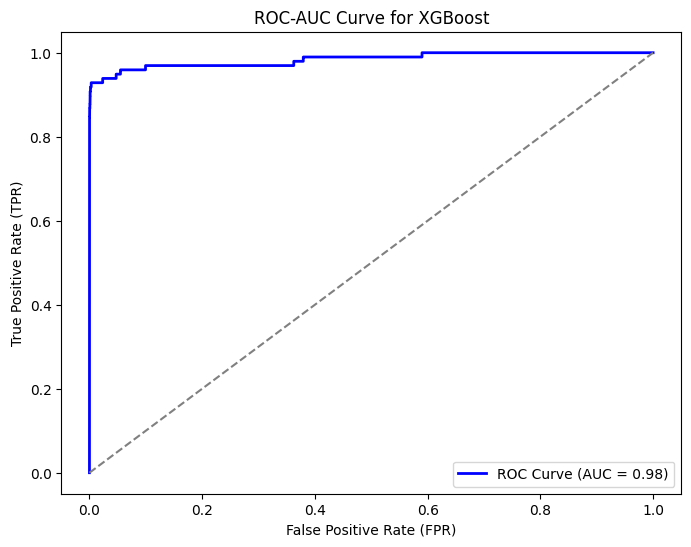

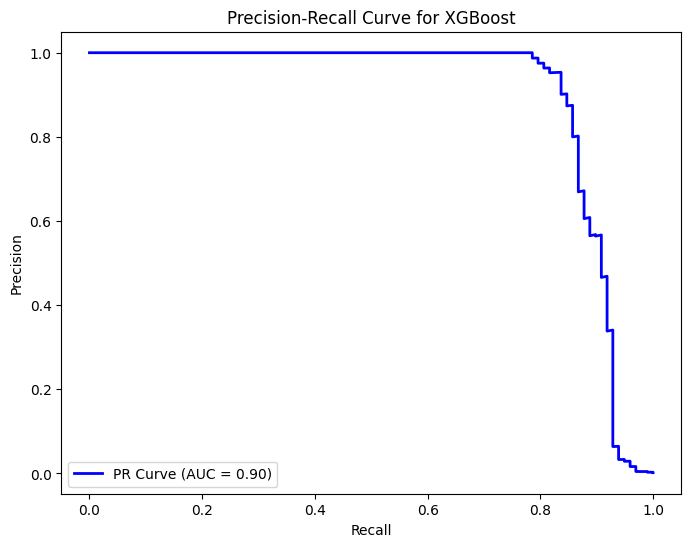

In [126]:
# Make predictions
y_pred = best_model.predict(x_test)

y_probability = best_model.predict_proba(x_test)[:, 1]  # Probabilities for positive class

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probability)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_probability)
pr_auc = auc(recall, precision)

# Plot ROC-AUC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference diagonal
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC-AUC Curve for XGBoost")
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for XGBoost")
plt.legend(loc="lower left")
plt.show()

**XGBoost delivers exceptional fraud detection performance with high precision (0.97) and strong recall (0.80), ensuring minimal false positives while detecting 80% of fraud cases. The F1-score (0.88) and accuracy (99.96%) confirm its reliability in distinguishing fraud from non-fraud transactions. The Precision-Recall AUC (0.90) highlights its superior fraud detection capability compared to previous models. Overall, XGBoost proves to be a robust and efficient choice for fraud detection**

**3.LightGBM**

In [7]:
# Prepping up the data
X = Credit_Card_DataFrame.drop(columns=["Class"])
scaler = StandardScaler()
X[["Time","Amount"]] = scaler.fit_transform(X[["Time","Amount"]])
y = Credit_Card_DataFrame["Class"]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1111, stratify=y)

In [8]:
%%capture
# Define the XGBoost classifier correctly
LGBM = lgb.LGBMClassifier(
    n_estimators=1000,
    max_depth=-1,
    boosting_type='gbdt',
    random_state=1111
)
# Define the parameter grid correctly
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
}

# Define GridSearchCV
Light_GBM_grid_search = GridSearchCV(
    estimator=LGBM,  # Use the model instance, not a direct call
    param_grid=param_grid,
    cv=5,
    scoring='f1'
)
Light_GBM_grid_search.fit(x_train, y_train)

In [ ]:
%%capture
# Get the best parameters
print("Best Parameters:", Light_GBM_grid_search.best_params_)
# Train the best model
best_model = Light_GBM_grid_search.best_estimator_
best_model.fit(x_train, y_train)

Best Parameters: {'learning_rate': 0.01}
[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339


LGBMClassifier(learning_rate=0.01, n_estimators=1000, random_state=1111)

Best Parameters: {'learning_rate': 0.01}
Accuracy: 0.9995435553526912

Confusion Matrix:
 [[56861     3]
 [   23    75]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.77      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



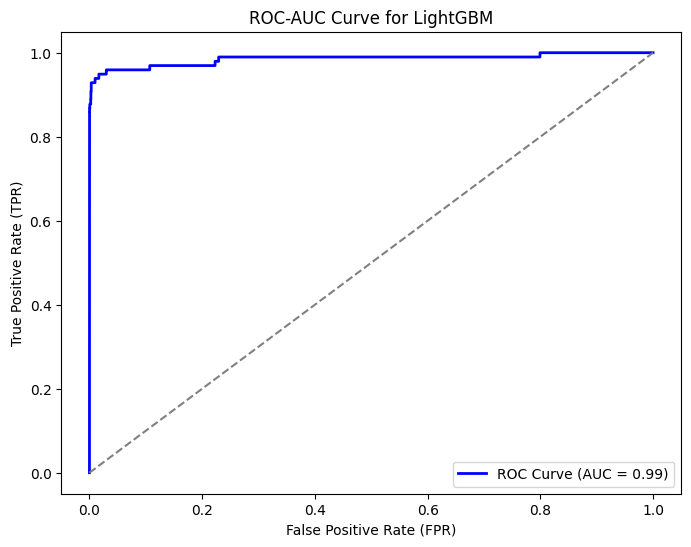

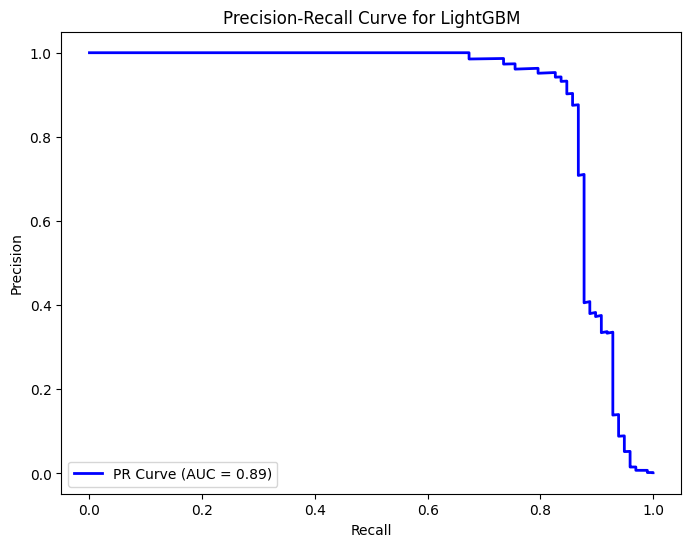

In [129]:
y_pred = best_model.predict(x_test)
y_probability = best_model.predict_proba(x_test)[:, 1]  # Probabilities for positive class

# Evaluate performance
print("Best Parameters:", Light_GBM_grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probability)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_probability)
pr_auc = auc(recall, precision)

# Plot ROC-AUC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference diagonal
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC-AUC Curve for LightGBM")
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for LightGBM")
plt.legend(loc="lower left")
plt.show()

**LightGBM delivers high precision (0.96) and strong recall (0.77), achieving an F1-score of 0.85 and an accuracy of 99.95%, making it a solid fraud detection model. However, compared to XGBoost, which had a slightly higher recall (0.80) and F1-score (0.88), LightGBM misses more fraud cases (23 vs. 20). Both models maintain excellent precision, but XGBoost performs slightly better in capturing fraudulent transactions while maintaining a higher Precision-Recall AUC (0.90 vs. LightGBM's expected lower value). If speed and efficiency are priorities, LightGBM is advantageous, but for maximum fraud detection accuracy, XGBoost remains the better choice.**